PimaDiabetesDataset-Analysis

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Load the Pima Diabeties dataset
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Attributes Glucose, BloodPressure, SkinThickness, Insulin, BMI having zero values.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observed columns DiabetesPedigreeFunction and BMI having float datatype. All others are of integer type.

In [6]:
#Check For null values in the dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Check for zero values in the dataset
dataset['Pregnancies'][dataset['Pregnancies'] == 0].count()

111

In [8]:
dataset['Glucose'][dataset['Glucose'] == 0].count()

5

In [9]:
dataset['BloodPressure'][dataset['BloodPressure'] == 0].count()

35

In [10]:
dataset['SkinThickness'][dataset['SkinThickness'] == 0].count()

227

In [11]:
dataset['Insulin'][dataset['Insulin'] == 0].count()

374

In [12]:
dataset['BMI'][dataset['BMI'] == 0].count()

11

In [13]:
dataset['Age'][dataset['Age'] == 0].count()

0

In [14]:
dataset['DiabetesPedigreeFunction'][dataset['DiabetesPedigreeFunction'] == 0].count()

0

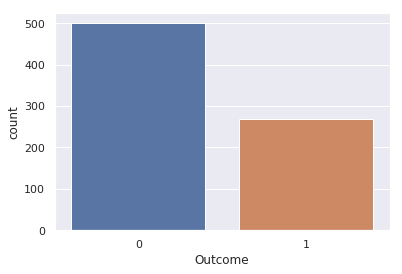

In [15]:
sns.countplot(dataset['Outcome'])

the Non-Diabetic persons are more than the diabetics

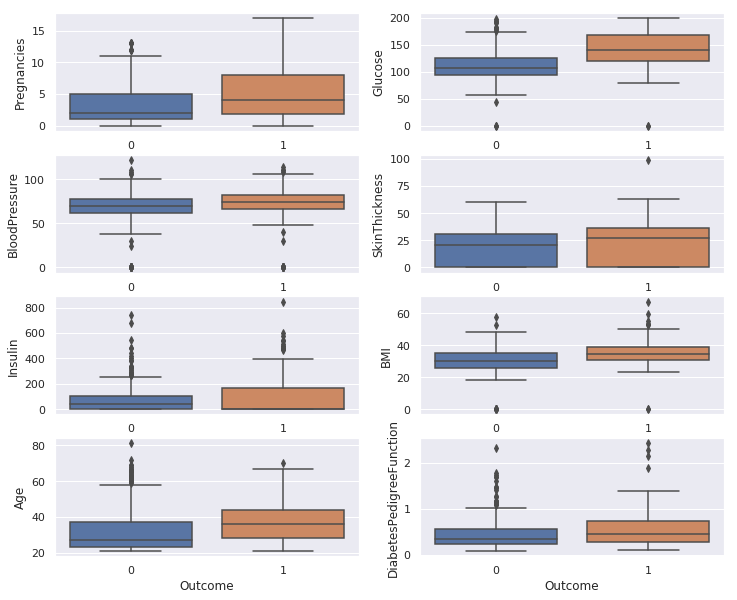

In [16]:
#Look for outliers in the dataset
fig, axarr = plt.subplots(4, 2, figsize=(12, 10))
sns.boxplot(dataset['Outcome'], dataset['Pregnancies'],ax=axarr[0][0])
sns.boxplot(dataset['Outcome'], dataset['Glucose'],ax=axarr[0][1])
sns.boxplot(dataset['Outcome'], dataset['BloodPressure'],ax=axarr[1][0])
sns.boxplot(dataset['Outcome'], dataset['SkinThickness'],ax=axarr[1][1])
sns.boxplot(dataset['Outcome'], dataset['Insulin'],ax=axarr[2][0])
sns.boxplot(dataset['Outcome'], dataset['BMI'],ax=axarr[2][1])
sns.boxplot(dataset['Outcome'], dataset['Age'],ax=axarr[3][0])
sns.boxplot(dataset['Outcome'], dataset['DiabetesPedigreeFunction'],ax=axarr[3][1])

Observed that spread of attributes is quite different. Attributes Age, Insulin appear to be quite skewed towards smaller values.

In [17]:
#replace zero values with median
dataset['Glucose'].replace(0,dataset['Glucose'].median(),inplace=True) 
dataset['BloodPressure'].replace(0,dataset['BloodPressure'].median(),inplace=True) 
dataset['SkinThickness'].replace(0,dataset['SkinThickness'].median(),inplace=True) 
dataset['Insulin'].replace(0,dataset['Insulin'].median(),inplace=True) 
dataset['BMI'].replace(0,dataset['BMI'].median(),inplace=True)

In [18]:
dataset.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122cbc0b8>,
      dtype=object)

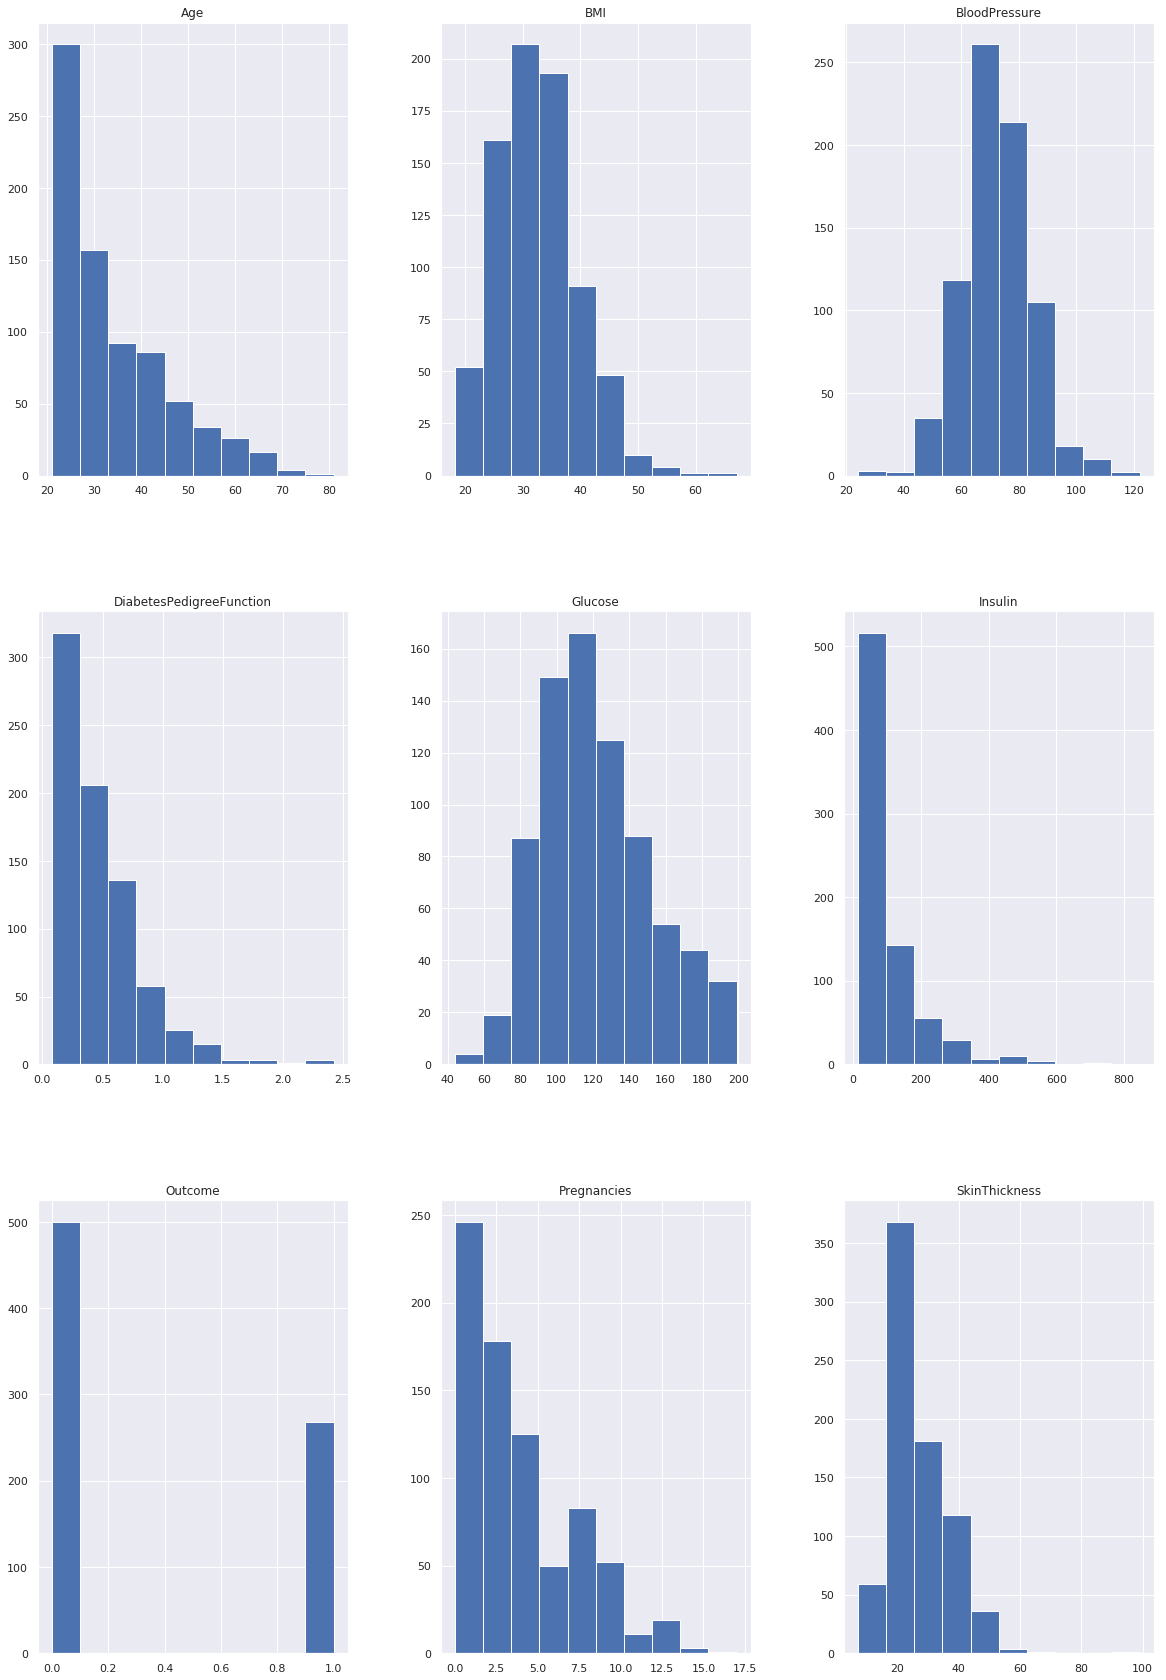

In [19]:
dataset.hist(figsize=(20,30))

Attributes BMI, BloodPressure, Glucose are found to be normally distributed. BMI and BloodPressure nearly have Gaussian distribution. Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed

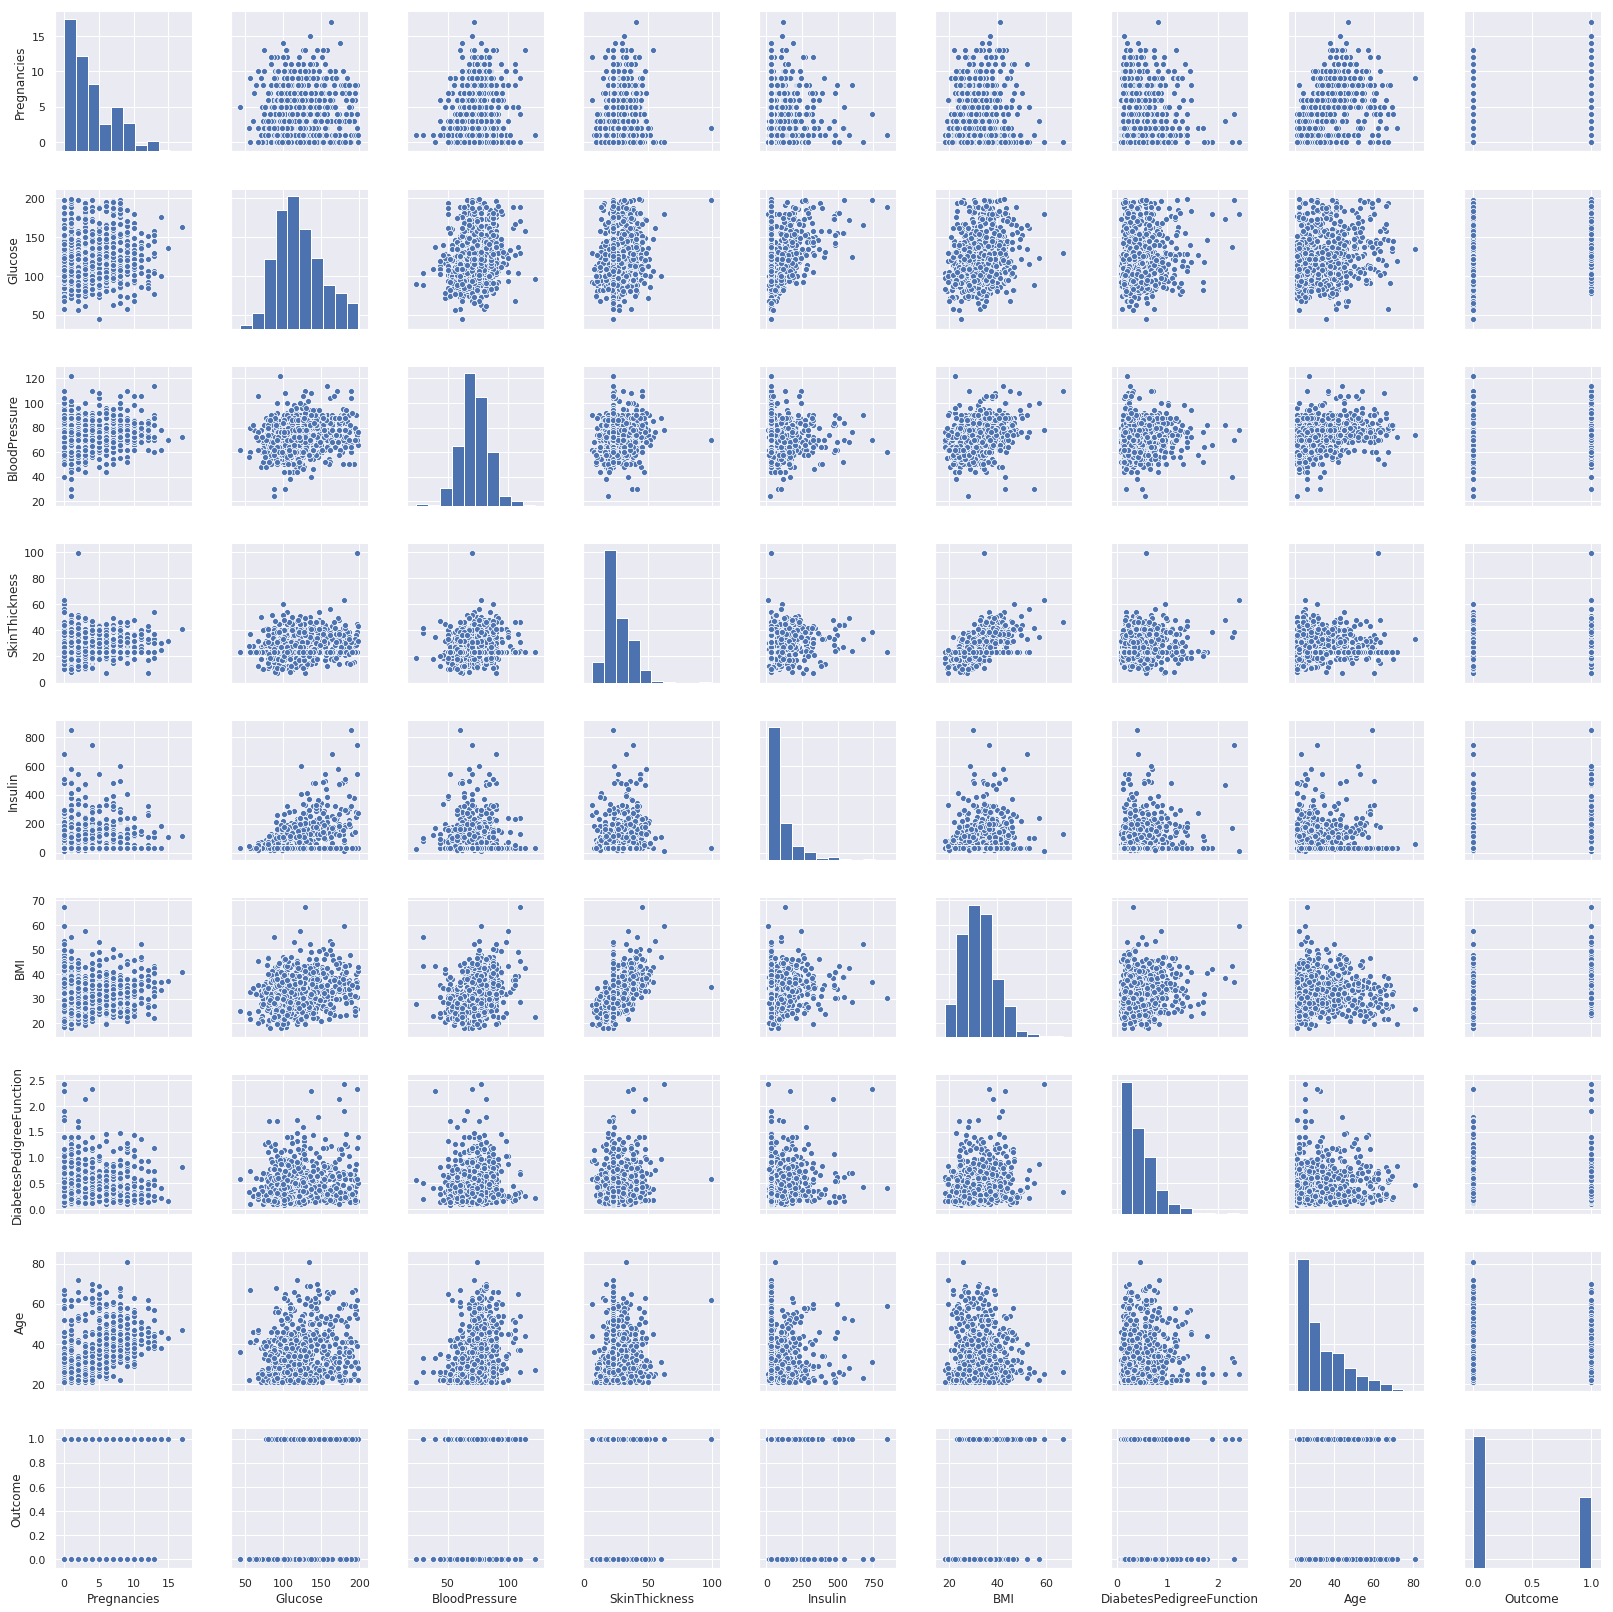

In [20]:
sns.pairplot(dataset)

In [21]:
#find the corelation in the dataset
corr = dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


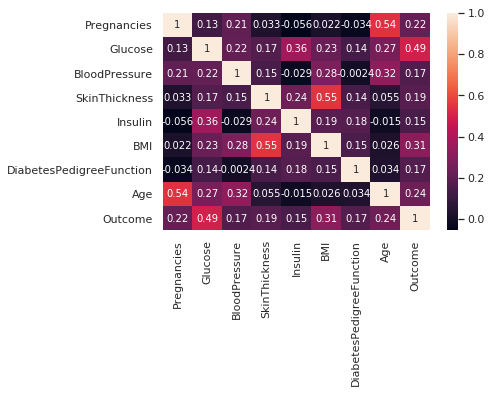

In [22]:
sns.heatmap(corr, annot=True)

Observed that attributes BloodPressure, SkinThickness are not much related to outcome.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


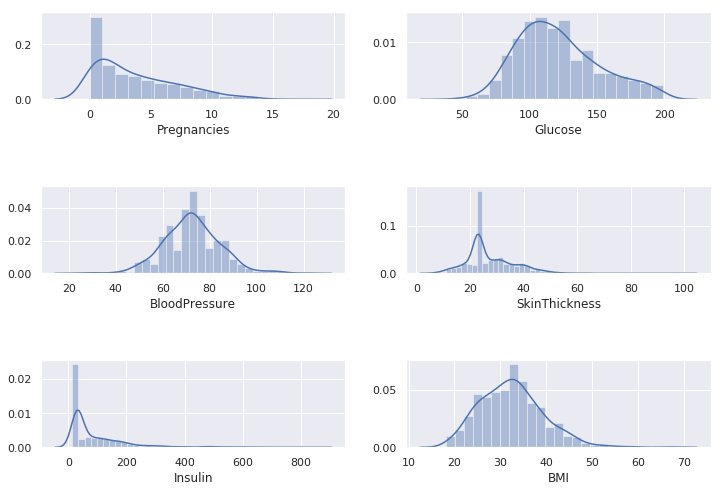

In [23]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))

sns.distplot(dataset['Pregnancies'],ax=axarr[0][0])
sns.distplot(dataset['Glucose'],ax=axarr[0][1])
sns.distplot(dataset['BloodPressure'],ax=axarr[1][0])
sns.distplot(dataset['SkinThickness'],ax=axarr[1][1])
sns.distplot(dataset['Insulin'],ax=axarr[2][0])
sns.distplot(dataset['BMI'],ax=axarr[2][1])

plt.subplots_adjust(hspace=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


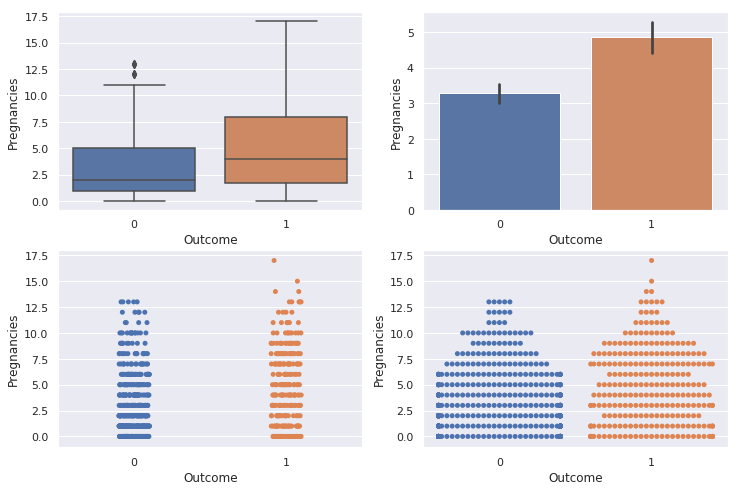

In [24]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['Pregnancies'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['Pregnancies'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['Pregnancies'], ax=axarr[1][1])

After Pregnancy people are more likely to have Diabetes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


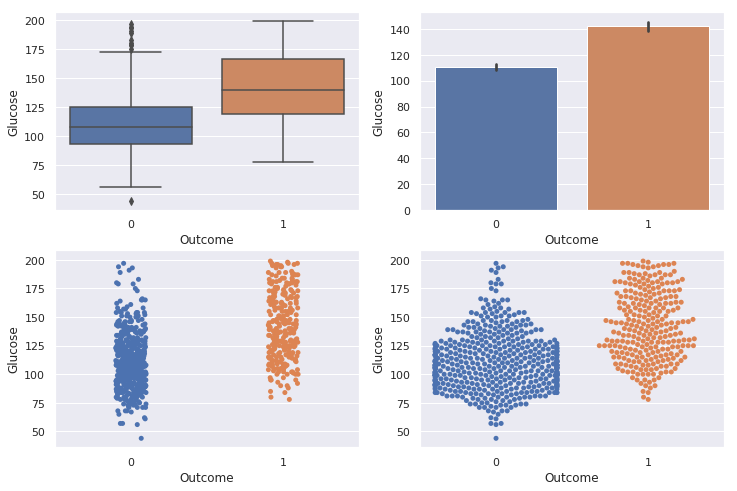

In [25]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['Glucose'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['Glucose'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['Glucose'], ax=axarr[1][1])

People with High Glucose level are more likley to have Diabetes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


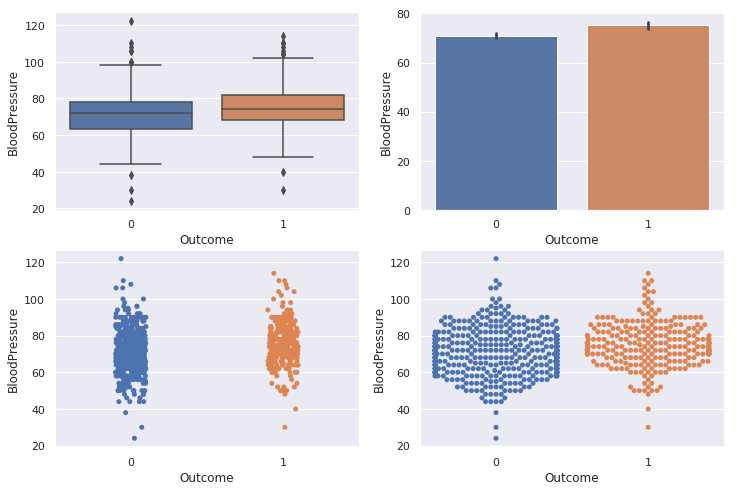

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['BloodPressure'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['BloodPressure'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['BloodPressure'], ax=axarr[1][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


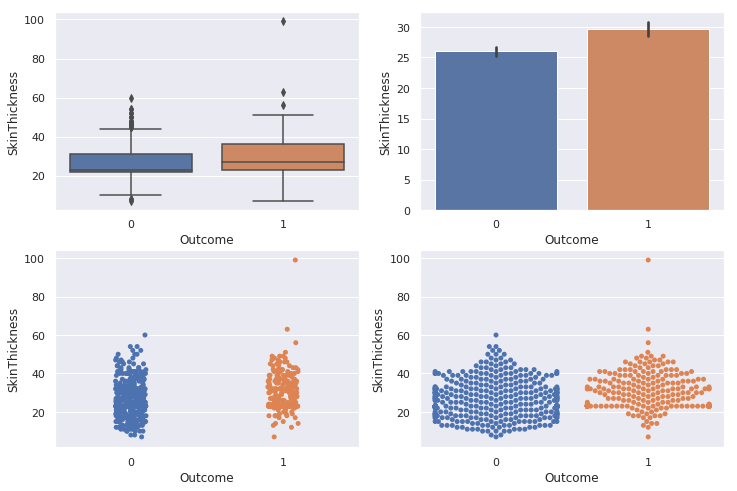

In [27]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['SkinThickness'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['SkinThickness'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['SkinThickness'], ax=axarr[1][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


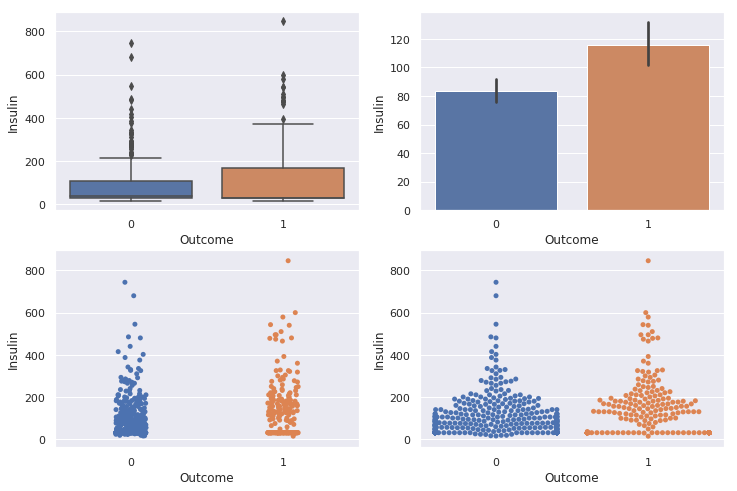

In [28]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['Insulin'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['Insulin'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['Insulin'], ax=axarr[1][1])

People with High Insulin level are more likley to have Diabetes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


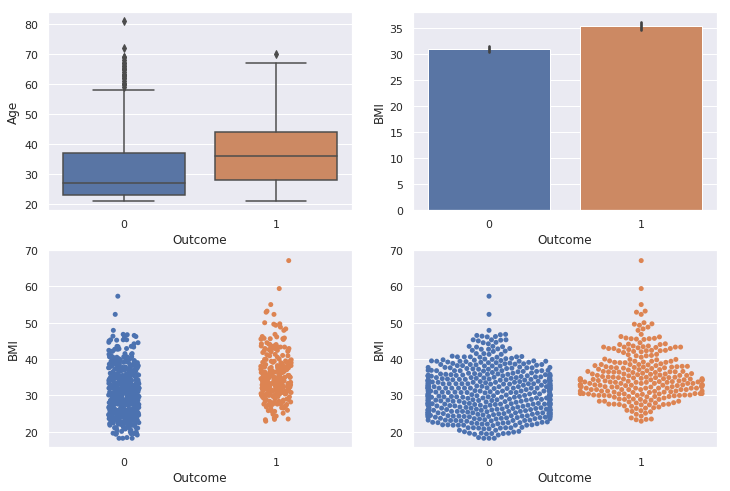

In [29]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Age", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['BMI'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['BMI'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['BMI'], ax=axarr[1][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


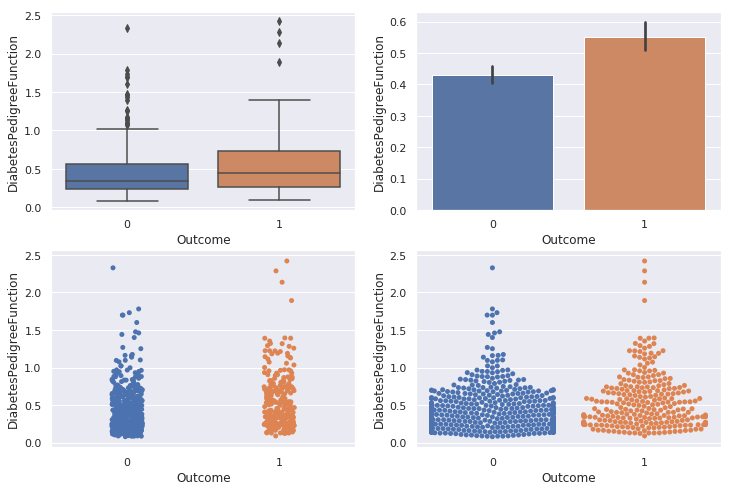

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['DiabetesPedigreeFunction'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['DiabetesPedigreeFunction'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['DiabetesPedigreeFunction'], ax=axarr[1][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


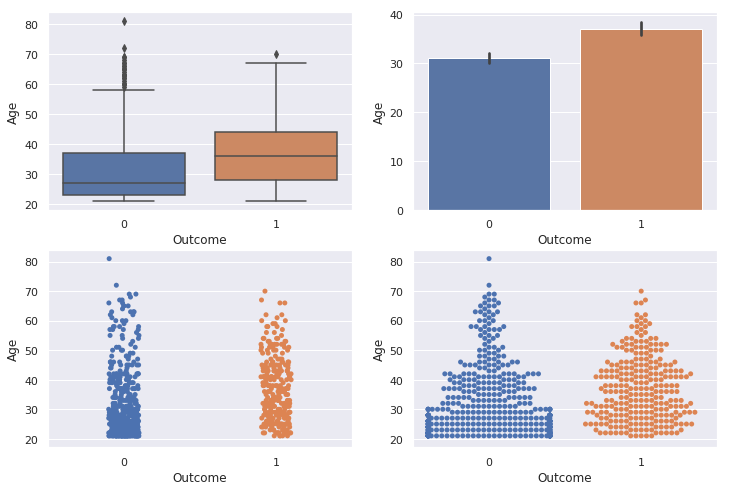

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Age", data=dataset,ax=axarr[0][0])
sns.barplot(dataset['Outcome'], dataset['Age'],ax=axarr[0][1])
sns.stripplot(dataset['Outcome'], dataset['Age'], jitter=True,ax=axarr[1][0])
sns.swarmplot(dataset['Outcome'], dataset['Age'], ax=axarr[1][1])

Older People are more likley to have Diabetes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


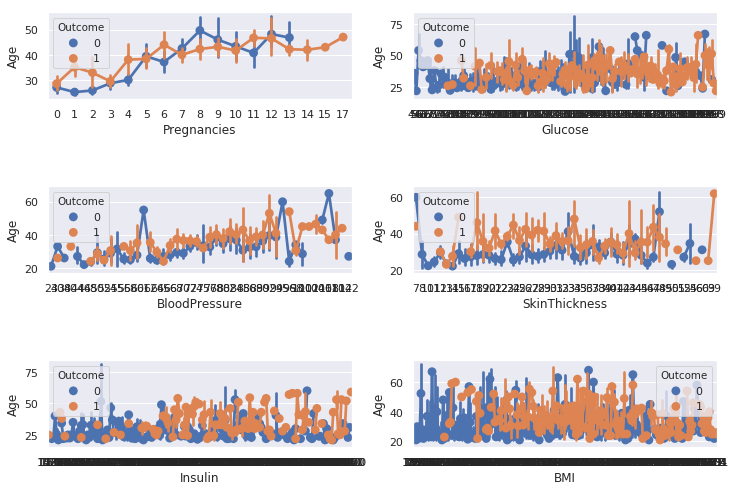

In [32]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=1)
sns.pointplot(dataset['Pregnancies'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[0][0])
sns.pointplot(dataset['Glucose'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[0][1])
sns.pointplot(dataset['BloodPressure'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[1][0])
sns.pointplot(dataset['SkinThickness'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[1][1])
sns.pointplot(dataset['Insulin'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[2][0])
sns.pointplot(dataset['BMI'], dataset['Age'], hue=dataset['Outcome'],ax=axarr[2][1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


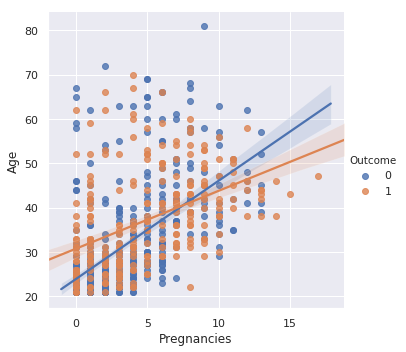

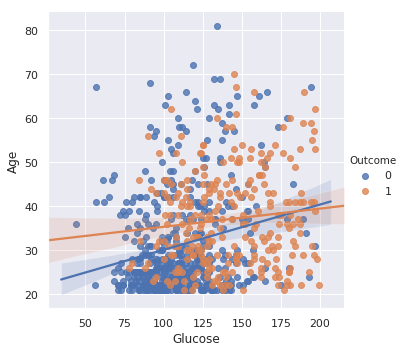

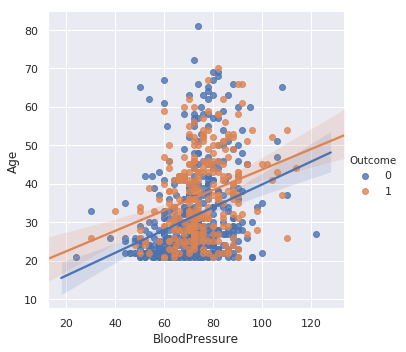

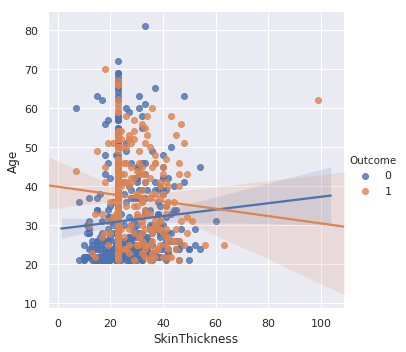

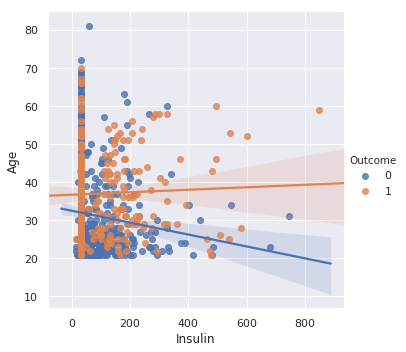

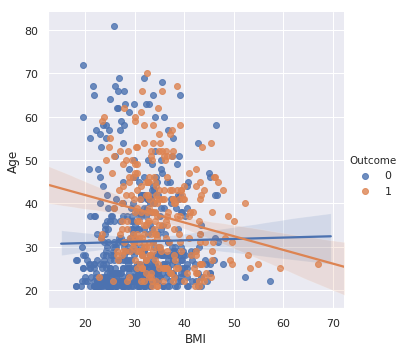

In [33]:
sns.lmplot(x="Pregnancies", y="Age",hue="Outcome", data=dataset)
sns.lmplot(x="Glucose", y="Age",hue="Outcome", data=dataset)
sns.lmplot(x="BloodPressure", y="Age",hue="Outcome", data=dataset)
sns.lmplot(x="SkinThickness", y="Age",hue="Outcome", data=dataset)
sns.lmplot(x="Insulin", y="Age",hue="Outcome", data=dataset)
sns.lmplot(x="BMI", y="Age",hue="Outcome", data=dataset)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


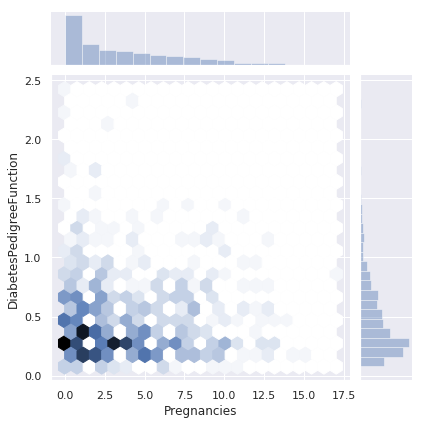

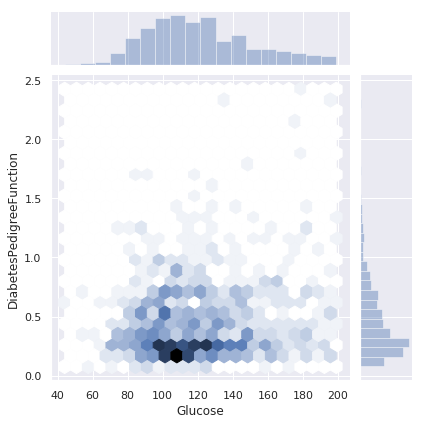

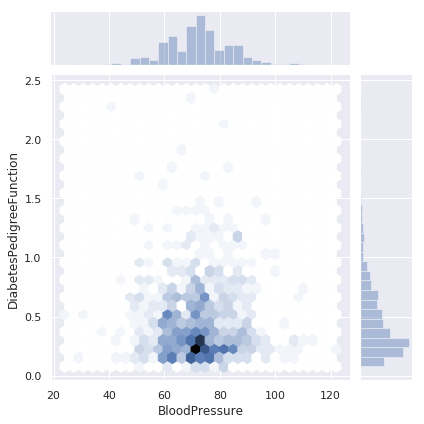

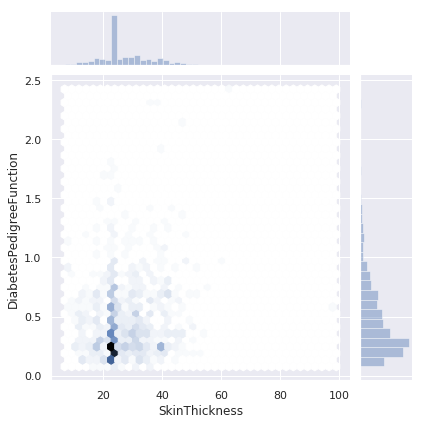

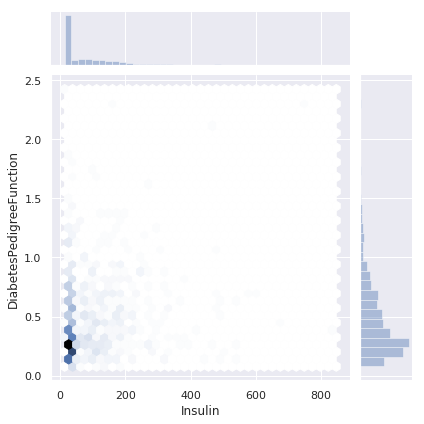

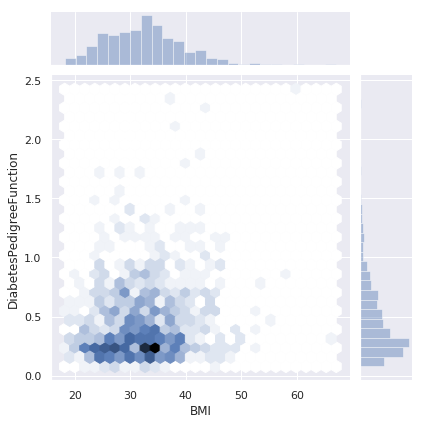

In [34]:
sns.jointplot(dataset['Pregnancies'], dataset['DiabetesPedigreeFunction'], kind='hex')
sns.jointplot(dataset['Glucose'], dataset['DiabetesPedigreeFunction'], kind='hex')
sns.jointplot(dataset['BloodPressure'], dataset['DiabetesPedigreeFunction'], kind='hex')
sns.jointplot(dataset['SkinThickness'], dataset['DiabetesPedigreeFunction'], kind='hex')
sns.jointplot(dataset['Insulin'], dataset['DiabetesPedigreeFunction'], kind='hex')
sns.jointplot(dataset['BMI'], dataset['DiabetesPedigreeFunction'], kind='hex')

In [35]:
pd.pivot_table(dataset,index=['Outcome'],aggfunc=len)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,500,500.0,500,500.0,500,500.0,500,500
1,268,268.0,268,268.0,268,268.0,268,268


In [36]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [37]:
reg=linear_model.LogisticRegression()

In [38]:
y=dataset['Outcome']
X=dataset.drop(['Outcome'],axis=1)

In [39]:
reg.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
reg.coef_,reg.intercept_

(array([[ 0.1193516 ,  0.03199668, -0.02501924, -0.00293105, -0.00112918,
          0.07008693,  0.64532013,  0.00703972]]), array([-5.90221378]))

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
data_X = dataset.iloc[:,0:8]
data_Y = dataset.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [43]:
fit = select_top_4.fit(data_X,data_Y)
features = fit.transform(data_X)

In [44]:
features

array([[  6. , 148. ,  30.5,  50. ],
       [  1. ,  85. ,  30.5,  31. ],
       [  8. , 183. ,  30.5,  32. ],
       ...,
       [  5. , 121. , 112. ,  30. ],
       [  1. , 126. ,  30.5,  47. ],
       [  1. ,  93. ,  30.5,  23. ]])

In [45]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


the top performing features are Pregnancies, Glucose, BMI, Insulin and Age

**Insights from the dataset**

1. Attributes Glucose, BloodPressure, SkinThickness, Insulin, BMI having zero values.
2. Observed columns DiabetesPedigreeFunction and BMI having float datatype. All others are of integer type.
3. Observed columns do not contain any null values.
4. Observed that the spread of attributes is quite different. Attributes Age, Insulin appears to be quite skewed towards smaller values.
5. Observed that BloodPressure between 60-80 is having low DiabetesPedigreeFunction.
6. Zero values can be replaced by the median of the column because Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI are having outliers.
7. Observed that the Non-Diabetic persons are more than the diabetics.
8. Attributes BMI, BloodPressure, Glucose are found to be normally distributed. BMI and BloodPressure nearly have Gaussian distribution Age,DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed.
9. Observed that attributes BloodPressure, SkinThickness are not much related to outcome.
10. Glucose, Age and BMI are the most Correlated features with the Outcome.
11. The top-performing features are Pregnancies, Glucose, BMI, Insulin, and Age
12. Older People are more likely to have Diabetes.
13. People with High Glucose level are more likely to have Diabetes.
14. After Pregnancy people are more likely to have Diabetes.
15. People with High Insulin level are more likely to have Diabetes.

![](http://)![](http://)**Apply Classification Methods **

In [46]:
# Importing packages for cross validation, logistic regression, RandomForestClassifier, SVC,
# KNeighborsClassifier and XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [47]:
X = dataset.drop('Outcome',1)
y = dataset.Outcome                # Save target variable in separate dataset

In [48]:
#Using LogisticRegression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7662337662337663

2 of kfold 5
accuracy_score 0.7012987012987013

3 of kfold 5
accuracy_score 0.7922077922077922

4 of kfold 5
accuracy_score 0.7450980392156863

5 of kfold 5
accuracy_score 0.7908496732026143


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [49]:
#Using RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7532467532467533

2 of kfold 5
accuracy_score 0.7337662337662337

3 of kfold 5
accuracy_score 0.7922077922077922

4 of kfold 5
accuracy_score 0.7516339869281046

5 of kfold 5
accuracy_score 0.7908496732026143


In [50]:
#Using XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7922077922077922

2 of kfold 5
accuracy_score 0.7727272727272727

3 of kfold 5
accuracy_score 0.7857142857142857

4 of kfold 5
accuracy_score 0.7450980392156863

5 of kfold 5
accuracy_score 0.7777777777777778


In [51]:
#Using SVC
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = SVC()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.6493506493506493

2 of kfold 5
accuracy_score 0.6493506493506493

3 of kfold 5
accuracy_score 0.6493506493506493

4 of kfold 5
accuracy_score 0.6535947712418301

5 of kfold 5
accuracy_score 0.6535947712418301


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

In [52]:
#Using KNeighborsClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = KNeighborsClassifier(n_neighbors=20)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7402597402597403

2 of kfold 5
accuracy_score 0.7207792207792207

3 of kfold 5
accuracy_score 0.7597402597402597

4 of kfold 5
accuracy_score 0.7124183006535948

5 of kfold 5
accuracy_score 0.7843137254901961
